In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
letter_df = pd.read_csv('letters.csv')

In [3]:
letter_df.shape

(42000, 46)

In [45]:
letter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Data columns (total 46 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   label     42000 non-null  int64
 1   pixel43   42000 non-null  int64
 2   pixel44   42000 non-null  int64
 3   pixel92   42000 non-null  int64
 4   pixel124  42000 non-null  int64
 5   pixel125  42000 non-null  int64
 6   pixel126  42000 non-null  int64
 7   pixel127  42000 non-null  int64
 8   pixel128  42000 non-null  int64
 9   pixel129  42000 non-null  int64
 10  pixel130  42000 non-null  int64
 11  pixel131  42000 non-null  int64
 12  pixel132  42000 non-null  int64
 13  pixel133  42000 non-null  int64
 14  pixel134  42000 non-null  int64
 15  pixel135  42000 non-null  int64
 16  pixel136  42000 non-null  int64
 17  pixel137  42000 non-null  int64
 18  pixel138  42000 non-null  int64
 19  pixel146  42000 non-null  int64
 20  pixel147  42000 non-null  int64
 21  pixel148  42000 non-null  int64
 22

In [47]:
letter_df.isnull().sum().sum()

0

In [53]:
letter_df['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

C:\Users\91956\Srinivas Shanmuga G\E-learning\Python\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


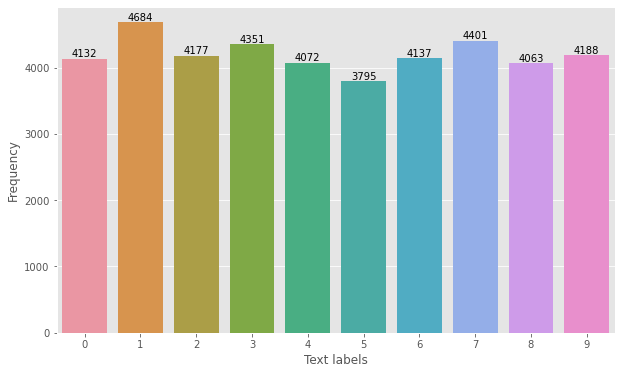

In [57]:
plt.figure(figsize=(10,6))
ax = sns.countplot(letter_df['label'])
ax.set_ylabel('Frequency')
ax.set_xlabel('Text labels')
for container in ax.containers:
        ax.bar_label(container)

In [23]:
pixel_data=letter_df.iloc[:,1:45]

In [24]:
X = letter_df.drop(['label'],axis=1)
y = letter_df['label']

In [69]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=369)

In [111]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(29400, 45) (29400,) (12600, 45) (12600,)


In [112]:
scaler = StandardScaler()
X_trainscaled = scaler.fit_transform(X_train)
X_testscaled = scaler.transform(X_test)

In [113]:
X_trainscaled

array([[-0.02644351, -0.02730801, -0.08286517, ..., -0.27607096,
        -0.17450321, -0.06925429],
       [-0.02644351, -0.02730801, -0.08286517, ..., -0.27607096,
        -0.17450321, -0.06925429],
       [-0.02644351, -0.02730801, -0.08286517, ..., -0.27607096,
        -0.17450321, -0.06925429],
       ...,
       [-0.02644351, -0.02730801, -0.08286517, ..., -0.27607096,
        -0.17450321, -0.06925429],
       [-0.02644351, -0.02730801, -0.08286517, ..., -0.27607096,
        -0.17450321, -0.06925429],
       [-0.02644351, -0.02730801, -0.08286517, ..., -0.27607096,
        -0.17450321, -0.06925429]])

In [114]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_trainscaled,y_train)
    pred_i = knn.predict(X_testscaled)
    error_rate.append(np.mean(pred_i != y_test))

Minimum error:- 0.3492063492063492 at K = 13


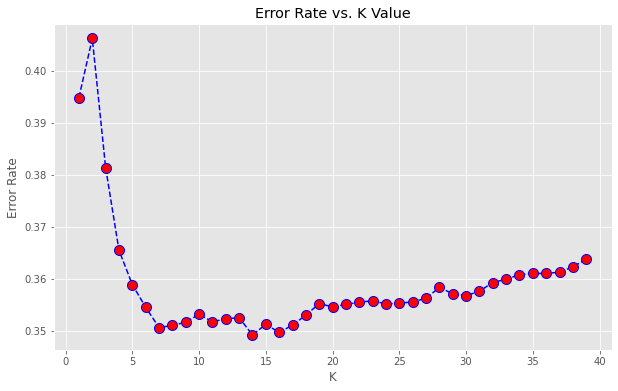

In [115]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='Blue',linestyle='--',marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [104]:
knn_model = KNeighborsClassifier()

param_grid = {'n_neighbors': np.arange(1, 30)}

knn_gscv = GridSearchCV(knn_model, param_grid, cv=5)

knn_gscv.fit(X_trainscaled,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [105]:
knn_gscv.best_params_

{'n_neighbors': 14}

In [106]:
from sklearn.metrics import classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=16,weights='uniform',metric='euclidean')

knn.fit(X_trainscaled,y_train)
pred = knn.predict(X_testscaled)

print('Accuracy',knn.score(X_trainscaled,y_train))

print('Confusion Matrix::')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print('Classification Report::')
print('\n')
print(classification_report(y_test,pred))

Accuracy 0.6808730158730159
Confusion Matrix::


[[1457    6   29    9   40    7   59   22    8   11]
 [   1 1818    5    9    5    7    5   15   19   12]
 [ 101   66  982  160   41   20   48   76  118   52]
 [  21   68  232  944   26   86   24   40  174   92]
 [  36  168    8   30  820   40   49  302    8  172]
 [  32   72   58  218   60  766   73  103   47  101]
 [  67   51   33   24   22   27 1448    0    6    1]
 [  16    6    4   44   56   57    0 1208   19  356]
 [  41  171  143  222   46   68   46   76  766   53]
 [  36   16    8   37   50   46    0  711   47  694]]


Classification Report::


              precision    recall  f1-score   support

           0       0.81      0.88      0.84      1648
           1       0.74      0.96      0.84      1896
           2       0.65      0.59      0.62      1664
           3       0.56      0.55      0.55      1707
           4       0.70      0.50      0.59      1633
           5       0.68      0.50      0.58      1530
           6 

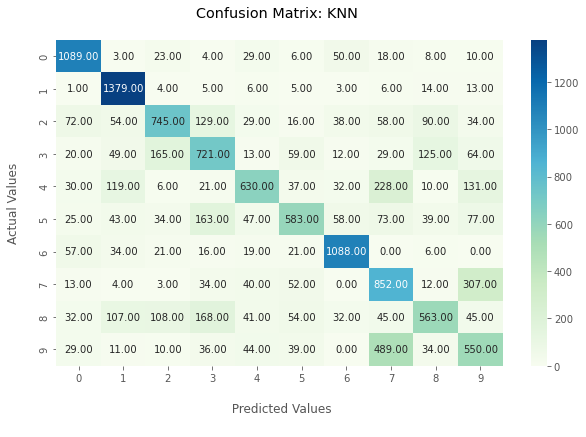

In [38]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix: KNN \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
# fx.xaxis.set_ticklabels(['','Under Value'])
# fx.yaxis.set_ticklabels(['Over Value','Under Value'])
plt.show()

In [121]:
clf = MLPClassifier(hidden_layer_sizes=(150,100,50),activation="relu",solver='adam',
                    learning_rate_init=0.001,max_iter=500,random_state=369)
clf.fit(X_trainscaled, y_train)
nn_pred=clf.predict(X_testscaled)

In [90]:
# selecting wrong predictions with correct and wrong labels
wrong_pred = X_testscaled[(pred != y_test)]
correct_labels = y_test[(pred != y_test)]
wrong_labels = pred[(pred != y_test)]

In [79]:
# parameters = {'solver': ['adam'], 'max_iter': [500,600,700,800,900,1000], 'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':np.arange(10, 15), 'random_state':[0,1,2,3,4,5,6,7,8,9]}
# clf = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)

In [122]:
print(clf.score(X_trainscaled, y_train))

0.837891156462585


In [123]:
print(clf.score(X_testscaled, y_test))
# print(clf.best_params_)

0.6667460317460318


In [124]:
print('Confusion Matrix::')
print('\n')
print(confusion_matrix(y_test,nn_pred))
print('\n')
print('Classification Report::')
print('\n')
print(classification_report(y_test,nn_pred))

Confusion Matrix::


[[1090    3   45   12   14    6   21   15   12   22]
 [   1 1332    7    6    6   15    8    4   39   18]
 [  61   33  729  152   19   32   14   42  137   46]
 [  16   26  107  669   13  169   10   27  153   67]
 [  35   43   21   10  660   60   21  217   26  151]
 [  16   18   13  105   30  729   43   46   56   86]
 [  30   18    8    8   34   56 1087    1   16    4]
 [  14    4    8   18   23   70    1  832   23  324]
 [  15   58   89  175   23   77   14   41  647   56]
 [  18    6    7   20   18   52    0  435   60  626]]


Classification Report::


              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1240
           1       0.86      0.93      0.89      1436
           2       0.71      0.58      0.63      1265
           3       0.57      0.53      0.55      1257
           4       0.79      0.53      0.63      1244
           5       0.58      0.64      0.61      1142
           6       0.89      0.86      0.

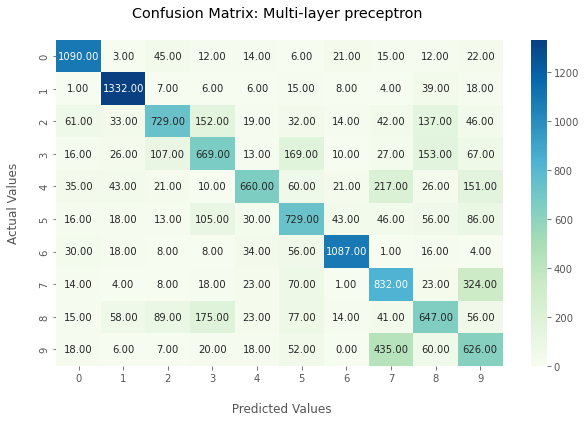

In [126]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,nn_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix: Multi-layer preceptron \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
# fx.xaxis.set_ticklabels(['','Under Value'])
# fx.yaxis.set_ticklabels(['Over Value','Under Value'])
plt.show()